# Problem
How to crop an image?
# Solution
One of the most frequent proccesses that is done on images is cropping. This can be done simply using indexing of arrays as ```image[start_y:stop_y , start_x:stop_x]```. 

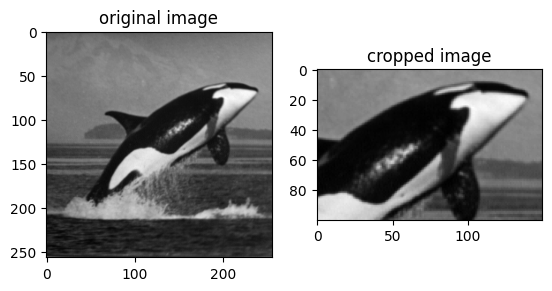

In [9]:
import matplotlib.pyplot as plt
im = plt.imread('orka.tif')
cropped_im = im[50:150, 100:250]
fig, ax = plt.subplots(1,2)
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('original image')
ax[1].imshow(cropped_im, cmap = 'gray')
ax[1].set_title('cropped image');

# Discussion
> When indexing arrays in python you should keep in mind that they are arranged in (y,x) manner.